In [10]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Define paths relative to the notebook directory
base_dir = Path.cwd().parent / "simulation_data"

In [3]:
file_paths = [base_dir / f"cdm_and_imem_data_neo_{i}.npy" for i in range(8)]

imem_data_list = [
    np.load(path, allow_pickle=True).item()
    for path in file_paths
]

imem_data = {}
for data in imem_data_list:
    imem_data.update(data)

In [7]:
get_idx_list = list(imem_data.keys())
selected_cells = ['L4_BP_bIR215_5', 'L5_MC_bAC217_1', 'L5_TTPC2_cADpyr232_3', 'L5_NGC_bNAC219_5']
positions = {item: get_idx_list.index(item) for item in selected_cells if item in get_idx_list}

items_list = list(imem_data.items())
selected_items = [items_list[positions['L4_BP_bIR215_5']], items_list[positions['L5_MC_bAC217_1']], items_list[positions['L5_TTPC2_cADpyr232_3']], items_list[positions['L5_NGC_bNAC219_5']]]


subset_imem_data = dict(selected_items)

In [13]:
short_cell_names = {
    'L4_BP_bIR215_5': 'L4 BP',
    "L5_MC_bAC217_1": "L5 MC",
    "L5_TTPC2_cADpyr232_3": "L5 TTPC",
    "L5_NGC_bNAC219_5": "L5 NGC"
}

cell_colors = {
    'L4_BP_bIR215_5': "tab:pink",
    "L5_MC_bAC217_1": "tab:cyan",
    "L5_TTPC2_cADpyr232_3": "tab:olive",
    "L5_NGC_bNAC219_5": 'tab:brown'
}

In [16]:
def plot_avg_imem_pos(data_dict):
    """
    Plots 'avg_return_pos_above_soma' and 'avg_return_pos_below_soma'
    against 'frequency' for each cell in the input dictionary.

    Args:
        data_dict (dict): A dictionary where each key is a cell name.
                          Each cell's value is another dictionary containing lists
                          for 'frequency', 'avg_return_pos_above_soma', and
                          'avg_return_pos_below_soma'.
    """
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.rcParams['mathtext.fontset'] = 'stix'


    # Iterate through each cell in the dictionary
    for i, cell_name in enumerate(data_dict.keys()):
        cell_info = data_dict[cell_name]
        
        # Extract the data for plotting
        frequency = cell_info['frequency']
        avg_pos_above = cell_info['avg_return_pos_above_soma']
        avg_pos_below = cell_info['avg_return_pos_below_soma']
        
        # Check if the data lists have the same length
        if len(frequency) != len(avg_pos_above) or len(frequency) != len(avg_pos_below):
            print(f"Warning: Skipping {cell_name} due to mismatched data lengths.")
            continue

        # Plot 'above soma' data with a solid line
        ax.semilogx(frequency[:-1], avg_pos_above[:-1], 
                label=f'{short_cell_names[cell_name]} (Above Soma)', 
                color=cell_colors[cell_name], 
                linestyle='-')
        
        # Plot 'below soma' data with a dashed line
        ax.semilogx(frequency[:-1], avg_pos_below[:-1], 
                label=f'{short_cell_names[cell_name]} (Below Soma)', 
                color=cell_colors[cell_name], 
                linestyle='--')

    # --- Add plot labels and title for clarity ---
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Average $I_\mathrm{m}$ Position (µm)')

    ax.set_xlim(left = 1, right = 2000)
    
    # --- Add grid and legend ---
    ax.grid(which='major', linestyle='-', linewidth=0.5, alpha=0.8)
    ax.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.8)
    ax.legend(fontsize = 5)

    plt.tight_layout() # Adjust layout to make room for legend
    #plt.savefig('/Users/susannedahle/Documents/Master/Code/Plots_artikkel/imem/avg_imem_pos_example_cells')
    plt.show()

<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_48900/4158905054.py:45: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Average $I_\mathrm{m}$ Position (µm)')


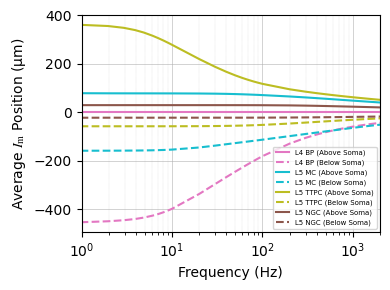

In [17]:
plot_avg_imem_pos(subset_imem_data)